<a href="https://colab.research.google.com/github/nurpurwanto/EDM-FINPRO-ECOMMERCE-SHIPPING/blob/main/EDM_Stage_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kelompok Enterprise Data Management [EDM]​**
##Final Project 

Anggota:

1. Arbi Indrawan​
2. Syafira Rizka Kurniawati​
3. Irena Chandra​
4. Denilson Pasaribu​
5. Intan Furqona T​risnaningrum
6. Elprida Agustina​
7. Nur Purwanto​
8. Arif Ibrahim​ Ginanjar

**Dataset : [Ecommerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics)**

*Data Description*<br>

**ID**: ID Number of Customers.<br>
**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,F.<br>
**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.<br>
**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.<br>
**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br>
**Cost of the product**: Cost of the Product in US Dollars.<br>
**Prior purchases**: The Number of Prior Purchase.<br>
**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.<br>
**Gender**: Male and Female.<br>
**Discount offered**: Discount offered on that specific product.<br>
**Weight in gms**: It is the weight in grams.<br>
**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

---

# <b> 1. LOAD DATASET

## <i> A. Import Library

In [650]:
#Lib for dataframe, agg, and data viz
from IPython import display
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 0
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_theme(style="whitegrid")
import numpy as np
from textwrap import wrap
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#lib for preprocessing
# Library for Scalling Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import boxcox
import warnings
# Library for Split Data
from sklearn.model_selection import train_test_split
# Library for Z-Score
from scipy import stats

# Import Library

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate

# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## <i> B. Menampilkan Dataset

In [651]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [652]:
%cd /content/gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [653]:
df = pd.read_csv('Train.csv')
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8657,8658,F,Ship,4,4,252,5,medium,M,2,1995,1
4559,4560,F,Ship,6,2,244,4,low,F,4,1245,1
4023,4024,B,Ship,3,4,175,3,low,M,6,5503,0
6415,6416,F,Road,4,4,218,6,medium,M,8,5101,1
3028,3029,C,Flight,5,2,172,4,high,F,61,1161,1


# <b> 2. DESCRIPTIVE STATISTICS

## <i> A. Menampilkan Informasi dataset

In [654]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dataset Ecommerce memiliki 10.999 baris dengan 12 kolom.

## <I> B. Menampilakan data kosong (null)

In [655]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Dataset tidak memiliki nilai kosong / null.

## <I> C. Menampilkan data duplikat

In [656]:
df.duplicated().sum()

0

In [657]:
df['ID'].duplicated().any()

False

Dataset yang tersedia tidak memiliki nilai/data yang duplikat.

## <I> D . Measure of Central Tendency (Ukuran Pemusatan)

### 1) Fungsi value count

In [658]:
#menghitung total value/nilai setiap kategori masing-masing kolom
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('___'*20, '\n')
    print()

Value count kolom ID:
1        1
7337     1
7329     1
7330     1
7331     1
        ..
3669     1
3670     1
3671     1
3672     1
10999    1
Name: ID, Length: 10999, dtype: int64
____________________________________________________________ 


Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
____________________________________________________________ 


Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
____________________________________________________________ 


Value count kolom Customer_care_calls:
4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64
____________________________________________________________ 


Value count kolom Customer_rating:
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64
____________________________________________________________ 




Fokus utama pada kolom(**Reached.on.Time_Y.N**) :
Dataset memiliki tingkat keterlambatan yang sangat besar sebanyak 6.563 dari 10.999 (lebih dari 50%)

### 2) Memisahkan kolom numerical dan categorical

In [659]:
# kebutuhan univariate & bivariate
#df=df.drop("ID", axis='columns')

#ubah type data Customer_rating & Reached.on.Time_Y.N to Object
df['ID']=df['ID'].astype(np.object)
df['Customer_rating']=df['Customer_rating'].astype(np.object)
df['Reached.on.Time_Y.N']=df['Reached.on.Time_Y.N'].astype(np.object)

df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

num = df_num.columns.values
cat = df_cat.columns.values

### C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [660]:
df.describe()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729
std,1.141490,48.063272,1.522860,16.205527,1635.377251
min,2.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,310.000000,10.000000,65.000000,7846.000000


Pada kolom Discount_offered nilai mean (13,37) memiliki perbedaan yang besar dengan nilai mediannya (median=7). Nilai maksimum dan minimumnya juga memiliki perbedaan yang sangat jauh, yakni min=1 dan maks = 65. Dari data statistik yang ditunjukkan, kolom **Discount_offered positively skewed distribution**.

### 3) Fungsi describe

In [661]:
df[num].describe() #Menampilkan nilai statistik untuk data numerical

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729
std,1.141490,48.063272,1.522860,16.205527,1635.377251
min,2.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,310.000000,10.000000,65.000000,7846.000000


Nilai **prior_purchases** dan **discount_offerd**  memiliki jarak yang jauh, <br>
    jika dilihat antara rata-rata (mean) dengan nilai tertinggi (max).

In [662]:
df[cat] = df[cat].astype('object') #mengubah setiap kolom menjadi object/string
df[cat].describe() #Menampilkan nilai statistik untuk data categorical

,ID,Warehouse_block,Mode_of_Shipment,Customer_rating,Product_importance,Gender,Reached.on.Time_Y.N
count,10999,10999,10999,10999,10999,10999,10999
unique,10999,5,3,5,3,2,2
top,1,F,Ship,3,low,F,1
freq,1,3666,7462,2239,5297,5545,6563


### 4) Fungsi mean, median, mode, quartile, percentile

#### a) Customer_care_calls

In [663]:
#mean, median, mode
print('mean    :', df['Customer_care_calls'].mean()) 
print('median  :', df['Customer_care_calls'].median())
print('mode    :', df['Customer_care_calls'].mode()[0])

#quartile
print('Q1      :', df['Customer_care_calls'].quantile(0.25))
print('Q3      :', df['Customer_care_calls'].quantile(0.75))

#percentile
print('P95     :', df['Customer_care_calls'].quantile(0.95))
print('P99     :', df['Customer_care_calls'].quantile(0.99))

mean    : 4.054459496317847
median  : 4.0
mode    : 4
Q1      : 3.0
Q3      : 5.0
P95     : 6.0
P99     : 7.0


Berdasarkan Quartile (Q1, Q3) dapat disimpulkan:<br>
<u>Kebanyakan</u> pelanggan sudah merasa cukup untuk telepon call center sebanyak <b>3-5x</b>.

#### b) Customer_rating

In [664]:
#mean, median, mode
print('mean    :', df['Customer_rating'].mean()) 
print('median  :', df['Customer_rating'].median())
print('mode    :', df['Customer_rating'].mode()[0])

#quartile
print('Q1      :', df['Customer_rating'].quantile(0.25))
print('Q3      :', df['Customer_rating'].quantile(0.75))

#percentile
print('P95     :', df['Customer_rating'].quantile(0.95))
print('P99     :', df['Customer_rating'].quantile(0.99))

mean    : 2.9905445949631786
median  : 3.0
mode    : 3
Q1      : 2.0
Q3      : 4.0
P95     : 5.0
P99     : 5.0


Banyak pelanggan memberikan rating atas pelayanan sebesar 3 dari 5.

#### c) Cost_of_the_Product

In [665]:
#mean, median, mode
print('mean    :', df['Cost_of_the_Product'].mean()) 
print('median  :', df['Cost_of_the_Product'].median())
print('mode    :', df['Cost_of_the_Product'].mode()[0])

#quartile
print('Q1      :', df['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df['Cost_of_the_Product'].quantile(0.99))

mean    : 210.19683607600692
median  : 214.0
mode    : 245
Q1      : 169.0
Q3      : 251.0
P95     : 279.0
P99     : 304.0


Berdasarkan data harga produk dapat dikelompokan menjadi : </mark><br>
Murah   : < 170<br>
Standar : 170 - 251<br>
Mahal   : > 251<br>

#### d) Prior_purchases

In [666]:
#mean, median, mode
print('mean    :', df['Prior_purchases'].mean()) 
print('median  :', df['Prior_purchases'].median())
print('mode    :', df['Prior_purchases'].mode()[0])

#quartile
print('Q1      :', df['Prior_purchases'].quantile(0.25))
print('Q3      :', df['Prior_purchases'].quantile(0.75))

#percentile
print('P95     :', df['Prior_purchases'].quantile(0.95))
print('P99     :', df['Prior_purchases'].quantile(0.99))

mean    : 3.5675970542776616
median  : 3.0
mode    : 3
Q1      : 3.0
Q3      : 4.0
P95     : 6.0
P99     : 10.0


Berdasarkan data pembelian dapat dikelompokan menjadi : </mark><br>
Silver   : < 4<br>
Gold     : 4-6<br>
Platinum : > 6<br>

#### e) Discount_offered

In [667]:
#mean, median, mode
print('mean    :', df['Discount_offered'].mean()) 
print('median  :', df['Discount_offered'].median())
print('mode    :', df['Discount_offered'].mode()[0])

#quartile
print('Q1      :', df['Discount_offered'].quantile(0.25))
print('Q3      :', df['Discount_offered'].quantile(0.75))

#percentile
print('P95     :', df['Discount_offered'].quantile(0.95))
print('P99     :', df['Discount_offered'].quantile(0.99))

mean    : 13.37321574688608
median  : 7.0
mode    : 10
Q1      : 4.0
Q3      : 10.0
P95     : 54.0
P99     : 63.0


Kebanyakan diskon yang diberikan adalah 10%

#### f) Weight_in_gms

In [668]:
#mean, median, mode
print('mean    :', df['Weight_in_gms'].mean()) 
print('median  :', df['Weight_in_gms'].median())
print('mode    :', df['Weight_in_gms'].mode()[0])

#quartile
print('Q1      :', df['Weight_in_gms'].quantile(0.25))
print('Q3      :', df['Weight_in_gms'].quantile(0.75))

#percentile
print('P95     :', df['Weight_in_gms'].quantile(0.95))
print('P99     :', df['Weight_in_gms'].quantile(0.99))

mean    : 3634.016728793527
median  : 4149.0
mode    : 4883
Q1      : 1839.5
Q3      : 5050.0
P95     : 5807.0
P99     : 5964.02


Berat produk yang paling banyak dibeli oleh pelanggan 4kg-5kg

#### g) Customer_rating vs Customer_care_calls

In [669]:
#mean, median, mode
print('mean    :', df.groupby(['Customer_rating'])['Customer_care_calls'].mean()) 
print('median  :', df.groupby(['Customer_rating'])['Customer_care_calls'].median())
print('mode    :', df.groupby(['Customer_rating'])['Customer_care_calls'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.25))
print('Q3      :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.95))
print('P99     :', df.groupby(['Customer_rating'])['Customer_care_calls'].quantile(0.99))

mean    : Customer_rating
1    4.036242
2    4.048961
3    4.058062
4    4.038831
5    4.090742
Name: Customer_care_calls, dtype: float64
median  : Customer_rating
1    4.0
2    4.0
3    4.0
4    4.0
5    4.0
Name: Customer_care_calls, dtype: float64
mode    : Customer_rating
1    4
2    4
3    4
4    4
5    4
Name: Customer_care_calls, dtype: int64
Q1      : Customer_rating
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
Name: Customer_care_calls, dtype: float64
Q3      : Customer_rating
1    5.0
2    5.0
3    5.0
4    5.0
5    5.0
Name: Customer_care_calls, dtype: float64
P95     : Customer_rating
1    6.0
2    6.0
3    6.0
4    6.0
5    6.0
Name: Customer_care_calls, dtype: float64
P99     : Customer_rating
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: Customer_care_calls, dtype: float64


Banyaknya panggilan melalui call center tidak mempengaruhi penilaian customer (rating)

#### h) Customer_rating vs Cost_of_the_Product 

In [670]:
#mean, median, mode
print('mean    :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].mean()) 
print('median  :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].median())
print('mode    :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df.groupby(['Customer_rating'])['Cost_of_the_Product'].quantile(0.99))

mean    : Customer_rating
1    208.979866
2    211.387067
3    209.384547
4    210.132937
5    211.164901
Name: Cost_of_the_Product, dtype: float64
median  : Customer_rating
1    213.0
2    215.0
3    213.0
4    212.0
5    218.0
Name: Cost_of_the_Product, dtype: float64
mode    : Customer_rating
1           258
2           254
3    [245, 257]
4           266
5           268
Name: Cost_of_the_Product, dtype: object
Q1      : Customer_rating
1    169.0
2    172.0
3    168.0
4    172.0
5    168.0
Name: Cost_of_the_Product, dtype: float64
Q3      : Customer_rating
1    250.0
2    252.0
3    249.5
4    251.0
5    253.0
Name: Cost_of_the_Product, dtype: float64
P95     : Customer_rating
1    276.0
2    279.0
3    277.1
4    280.0
5    281.0
Name: Cost_of_the_Product, dtype: float64
P99     : Customer_rating
1    303.00
2    304.00
3    305.62
4    300.12
5    302.00
Name: Cost_of_the_Product, dtype: float64


Hasil rating terhadap harga barang pun menunjukan nilai yang sama.

#### i) Prior_purchases vs Cost_of_the_Product

In [671]:
#mean, median, mode
print('mean    :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].mean()) 
print('median  :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].median())
print('mode    :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].agg(pd.Series.mode))

#quartile
print('Q1      :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.25))
print('Q3      :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.95))
print('P99     :', df.groupby(['Prior_purchases'])['Cost_of_the_Product'].quantile(0.99))

mean    : Prior_purchases
2     201.361293
3     200.147914
4     228.989327
5     226.881119
6     217.672014
7     204.955882
8     199.921875
10    202.168539
Name: Cost_of_the_Product, dtype: float64
median  : Prior_purchases
2     202.0
3     199.0
4     245.0
5     239.0
6     230.0
7     206.5
8     204.5
10    201.0
Name: Cost_of_the_Product, dtype: float64
mode    : Prior_purchases
2                 238
3                 192
4                 255
5                 245
6                 262
7     [233, 255, 266]
8                 261
10         [154, 190]
Name: Cost_of_the_Product, dtype: object
Q1      : Prior_purchases
2     165.00
3     162.00
4     186.00
5     207.00
6     185.00
7     169.25
8     154.00
10    162.00
Name: Cost_of_the_Product, dtype: float64
Q3      : Prior_purchases
2     238.00
3     239.00
4     271.00
5     258.00
6     254.00
7     240.00
8     239.25
10    242.00
Name: Cost_of_the_Product, dtype: float64
P95     : Prior_purchases
2     269.0
3     2

Melihat nilai dari modus maka :
Kebanyakan pelanggan yang membeli untuk ke 3x seharga 192 USD

#### j) Prior_purchases vs Weight_in_gms

In [672]:
#mean, median
print('mean    :', df.groupby(['Prior_purchases'])['Weight_in_gms'].mean()) 
print('median  :', df.groupby(['Prior_purchases'])['Weight_in_gms'].median())

#quartile
print('Q1      :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.25))
print('Q3      :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.75))

#percentile
print('P95     :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.95))
print('P99     :', df.groupby(['Prior_purchases'])['Weight_in_gms'].quantile(0.99))

mean    : Prior_purchases
2     4018.471720
3     4048.362579
4     3127.137355
5     2445.745144
6     3208.442068
7     4038.691176
8     4153.390625
10    4201.016854
Name: Weight_in_gms, dtype: float64
median  : Prior_purchases
2     4394.0
3     4440.0
4     2551.0
5     1727.0
6     2815.0
7     4367.5
8     4562.5
10    4449.5
Name: Weight_in_gms, dtype: float64
Q1      : Prior_purchases
2     2895.00
3     2936.50
4     1539.50
5     1362.00
6     1616.00
7     2699.50
8     3422.25
10    3411.75
Name: Weight_in_gms, dtype: float64
Q3      : Prior_purchases
2     5192.00
3     5214.00
4     4792.50
5     4016.00
6     4858.00
7     5282.75
8     5148.25
10    5299.25
Name: Weight_in_gms, dtype: float64
P95     : Prior_purchases
2     5840.0
3     5854.6
4     5728.2
5     5563.8
6     5689.0
7     5840.5
8     5752.0
10    5825.4
Name: Weight_in_gms, dtype: float64
P99     : Prior_purchases
2     5961.02
3     5977.46
4     5928.30
5     5888.14
6     5905.80
7     5981.85
8   

Setiap pembelian berikutnya rata-rata pelanggan membeli dengan berat lebih dari 2 kg.

## <i> E. Measure of Spread (Ukuran Penyebaran)

### 1) Fungsi range, variance, interquartil, Standard Deviation 

#### a) Customer_care_calls

In [673]:
#range, variance, interquartile 
print('Range               :', df['Customer_care_calls'].max() - df['Customer_care_calls'].min())
print('Variance            :', df['Customer_care_calls'].var())
print('Interquartile       :', df['Customer_care_calls'].quantile(0.75) - df['Customer_care_calls'].quantile(0.25))

#std
print('Standard Deviation  :', df['Customer_care_calls'].std())

Range               : 5
Variance            : 1.3029986144485912
Interquartile       : 2.0
Standard Deviation  : 1.141489647105304


#### b) Customer_rating

In [674]:
#range, variance, interquartile 
print('Range               :', df['Customer_rating'].max() - df['Customer_rating'].min())
print('Variance            :', df['Customer_rating'].var())
print('Interquartile       :', df['Customer_rating'].quantile(0.75) - df['Customer_rating'].quantile(0.25))

#std
print('Standard Deviation  :', df['Customer_rating'].std())

Range               : 4
Variance            : 1.9982739259752837
Interquartile       : 2.0
Standard Deviation  : 1.4136031713232975


#### c) Cost_of_the_Product

In [675]:
#range, variance, interquartile 
print('Range               :', df['Cost_of_the_Product'].max() - df['Cost_of_the_Product'].min())
print('Variance            :', df['Cost_of_the_Product'].var())
print('Interquartile       :', df['Cost_of_the_Product'].quantile(0.75) - df['Cost_of_the_Product'].quantile(0.25))

#std
print('Standard Deviation  :', df['Cost_of_the_Product'].std())

Range               : 214
Variance            : 2310.07809146167
Interquartile       : 82.0
Standard Deviation  : 48.06327175153258


#### d) Prior_purchases

In [676]:
#range, variance, interquartile 
print('Range               :', df['Prior_purchases'].max() - df['Prior_purchases'].min())
print('Variance            :', df['Prior_purchases'].var())
print('Interquartile       :', df['Prior_purchases'].quantile(0.75) - df['Prior_purchases'].quantile(0.25))

#std
print('Standard Deviation  :', df['Prior_purchases'].std())

Range               : 8
Variance            : 2.319102708687449
Interquartile       : 1.0
Standard Deviation  : 1.5228600423832288


#### e) Discount_offered

In [677]:
#range, variance, interquartile 
print('Range               :', df['Discount_offered'].max() - df['Discount_offered'].min())
print('Variance            :', df['Discount_offered'].var())
print('Interquartile       :', df['Discount_offered'].quantile(0.75) - df['Discount_offered'].quantile(0.25))

#std
print('Standard Deviation  :', df['Discount_offered'].std())

Range               : 64
Variance            : 262.61910796135953
Interquartile       : 6.0
Standard Deviation  : 16.205527080640096


#### f) Weight_in_gms

In [678]:
#range, variance, interquartile 
print('Range               :', df['Weight_in_gms'].max() - df['Weight_in_gms'].min())
print('Variance            :', df['Weight_in_gms'].var())
print('Interquartile       :', df['Weight_in_gms'].quantile(0.75) - df['Weight_in_gms'].quantile(0.25))

#std
print('Standard Deviation  :', df['Weight_in_gms'].std())

Range               : 6845
Variance            : 2674458.7544027916
Interquartile       : 3210.5
Standard Deviation  : 1635.3772514018872


## <i> F. Kesimpulan Descriptive Statistics

1. Tingkat keterlambatan cukup besar > 55% (terlambat (6563) : (4436) tepat waktu)
2. Sebanyak 10.999 baris dengan 12 kolom **tidak** memiliki nilai kosong dan duplikat.
3. Outlier hanya terjadi pada kolom **prior_purchases dan discount_offerd**.
4. Panggilan oleh pelanggan yang sering dilakukan sebanyak 3-5x dengan rata-rata rating adalah 3.


# <B> 3. UNIVARIATE ANALYSIS

## <i> A. Import Library

In [679]:
import matplotlib.pyplot as plt
import seaborn as sns

#mengatur ukuran grafik
from matplotlib import rcParams
rcParams ['figure.figsize'] = (10,7)

## <i> B. Distribusi Kolom Numerical

### 1) Melihat sebaran distribusi

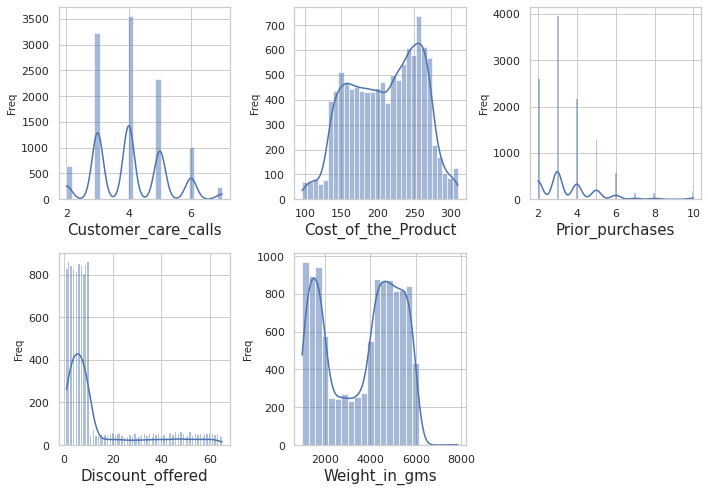

In [680]:
for i in range(len(num)):
    plt.subplot(len(num)//2, 3, i+1)
    ax = sns.histplot(
        x = df[num[i]],
        kde = True
    )
    ax.set_xlabel(num[i], fontsize = 15)
    ax.set_ylabel("Freq", fontsize = 10)
plt.tight_layout()

**Observasi :**
1. **discount_offered dan prior_purchases** memiliki distribusi skew.
2. **weight_in_gms dan cost_of_the_product** memiliki distribusi bimodal.
3. **customer_care_calls** memiliki distribusi normal.

### 2) Melihat boxplot untuk outlier

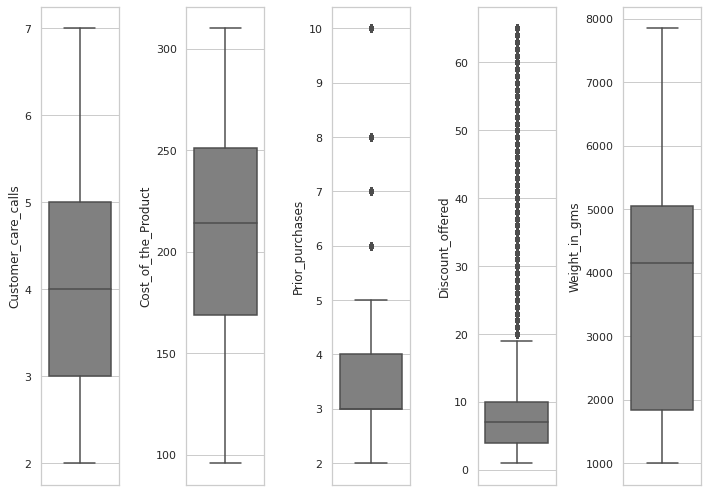

In [681]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='gray', orient='v')
    plt.tight_layout()

**Observasi :**
Semua data pada categori numerical memiliki distribusi normal tanpa outlier, kecuali **prior_purchases dan discount_offered**

## <i> C. Distribusi Kolom Categorical

### 1) Melihat persebaran kolom categorical

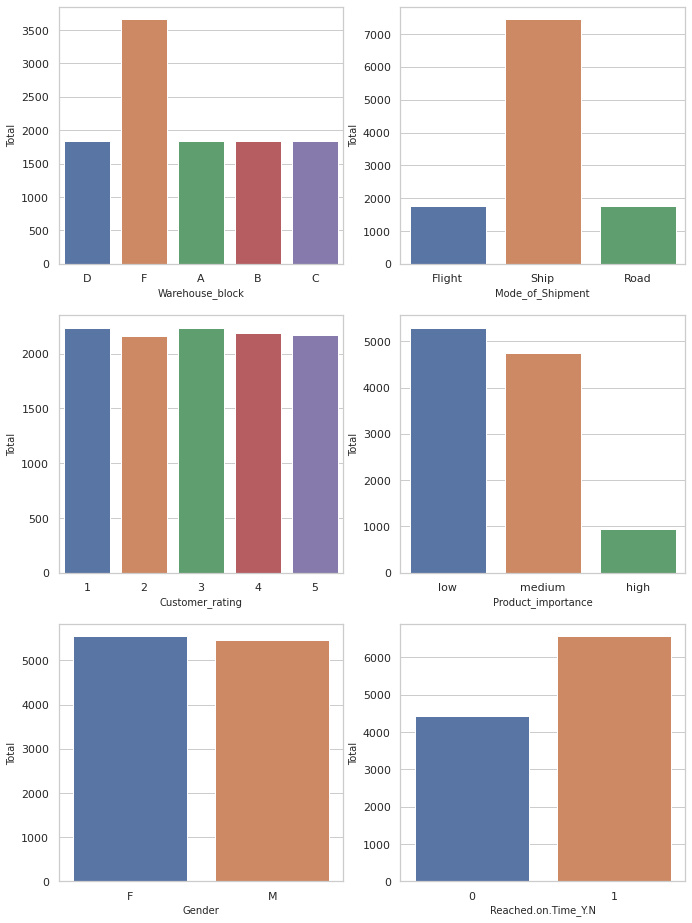

In [682]:
c = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
plt.figure(figsize=(10, 15))
for i in range(len(c)):
    plt.subplot(len(c)//2, 2, i+1)
    ax = sns.countplot(
        x = df[c[i]],
    )
    ax.set_xlabel(c[i], fontsize = 10)
    ax.set_ylabel("Total", fontsize = 10)
plt.show()

**Observasi :**
1. Warehouse **F** memiliki tingkat kesibukan paling besar daripada warehouse lainnya.
2. Mode pengiriman jalur laut memiliki tingkat keterpilihan yang besar dibanding mode pengiriman lainnya.
3. Rating hampir tersebar secara merata.
4. Tingkat kepentingan produk yang banyak adalah **low** artinya barang tersebut banyak yang tidak urgent.
5. Perempuan lebih mendominasi ketimbang Laki-laki.
6. Pengiriman belum optimal dibuktikan tingkat keterlambatan yang jauh dari ketepatan waktu.

### 2) Melihat persentase kolom categorical vs target (keterlambatan)

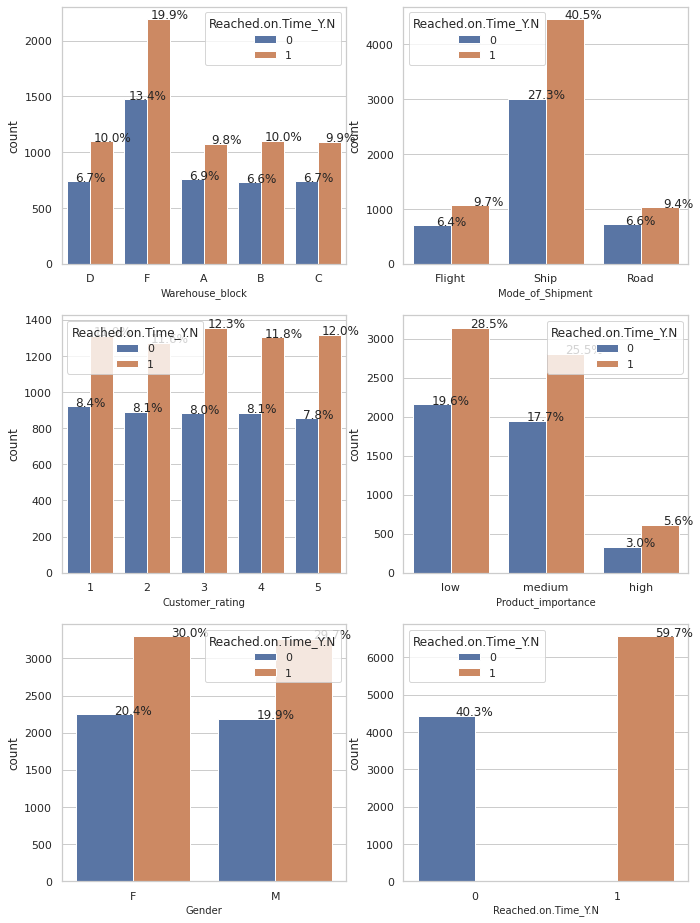

In [683]:
plt.figure(figsize=(10, 15))
for i in range(len(c)):
    plt.subplot(len(c)//2, 2, i+1)
    total = float(len(df))
    ax = sns.countplot(
        x = df[c[i]], data=df, hue='Reached.on.Time_Y.N'
    )
    ax.set_xlabel(c[i], fontsize = 10)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
plt.show()

**Observasi :**

Secara keseluruhan tingkat keterlambatan memiliki persebaran terbanyak terhadap seluruh data categorical.

# <b> 4. MULTIVARIATE ANALYSIS

## <i> A. Korelasi

In [684]:
df.corr()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Customer_care_calls,1.000000,0.323182,0.180771,-0.130750,-0.276615
Cost_of_the_Product,0.323182,1.000000,0.123676,-0.138312,-0.132604
Prior_purchases,0.180771,0.123676,1.000000,-0.082769,-0.168213
Discount_offered,-0.130750,-0.138312,-0.082769,1.000000,-0.376067
Weight_in_gms,-0.276615,-0.132604,-0.168213,-0.376067,1.000000


## <i> B. Heatmap

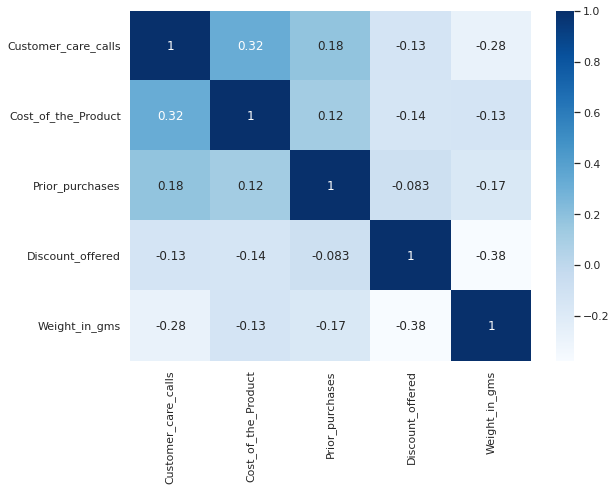

In [685]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

Tidak ada multicollinearity

## <I> C. Pair Plots

<Figure size 1080x1080 with 0 Axes>

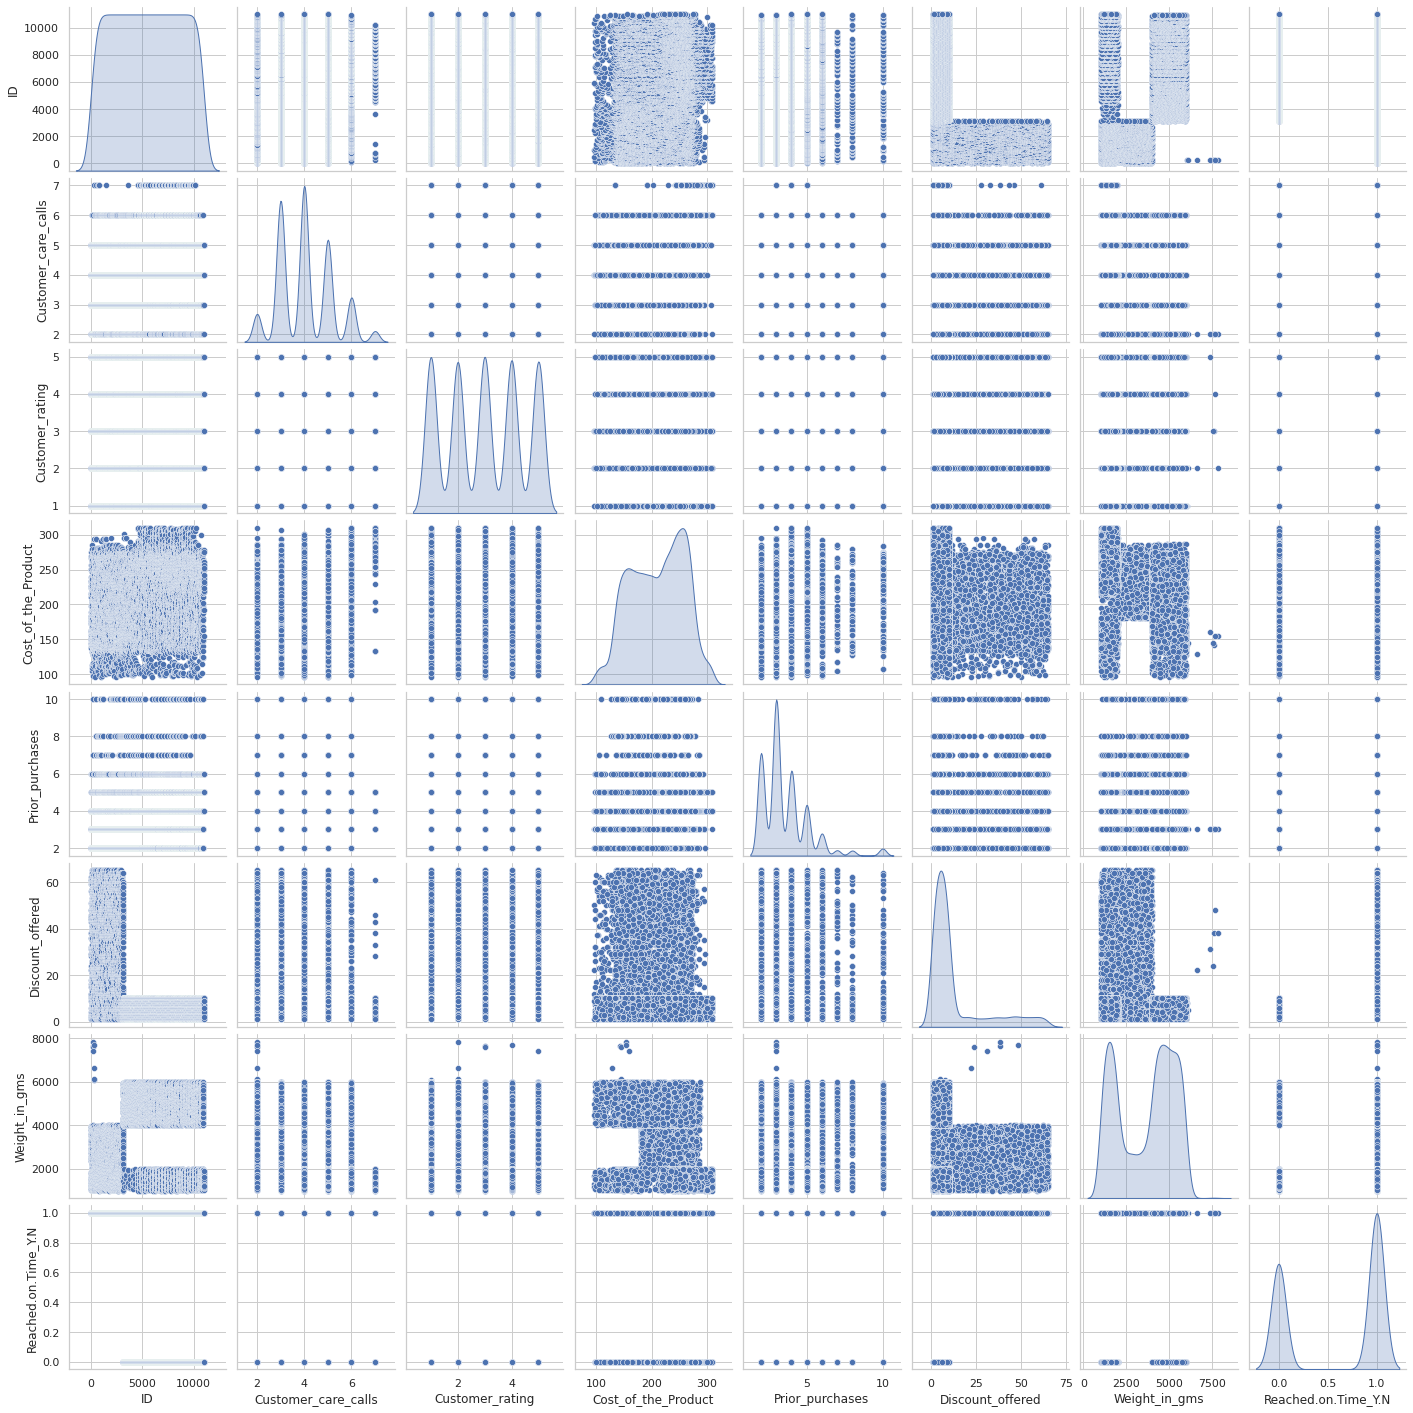

In [686]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

Ada beberapa pattern yang jelas yaitu : **ID, Weight,Cost of the product, dan diskon**

<Figure size 1080x1080 with 0 Axes>

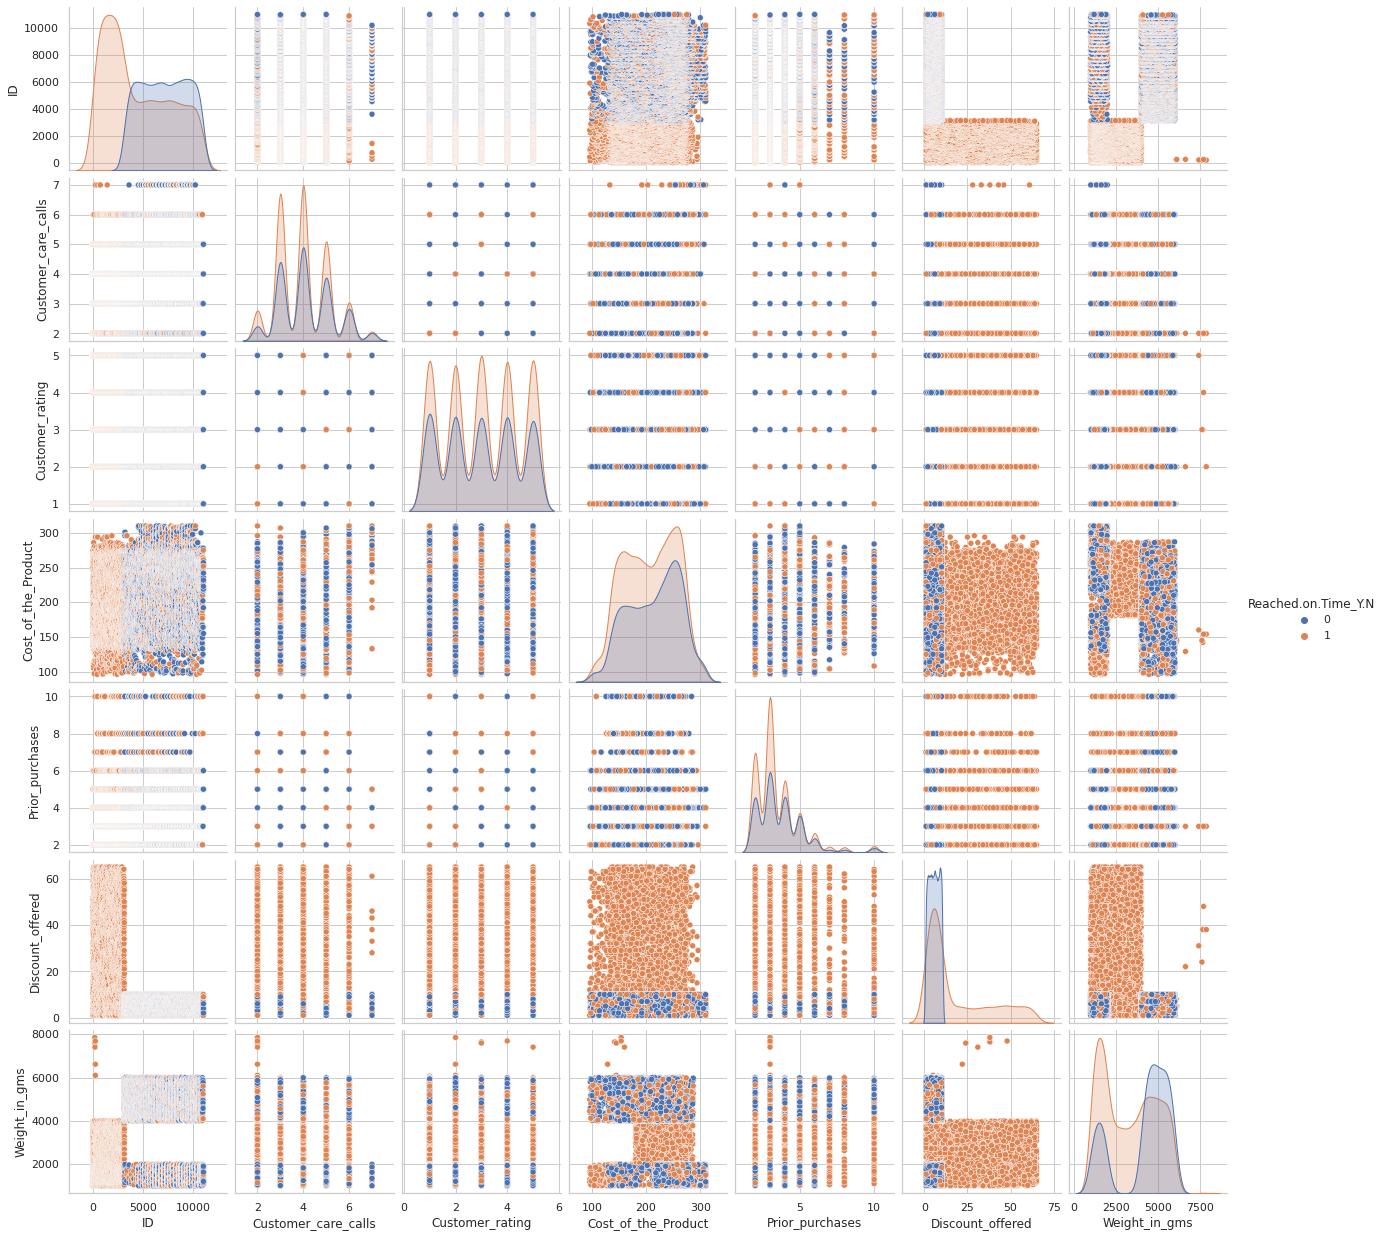

In [687]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')
plt.show()

**Interpretasi :**
1. Pelanggan awal memiliki keterlambatan yang dominan, dengan harga produk mencapai 300 USD dan diskon yang diberikan lebih dari 10%.
2. Pemberian diskon lebih dari 10% sangat dominan mengalami keterlambatan dan terjadi pada barang dengan berat 2-4kg.
3. Berat produk 1-4kg terbanyak dialami oleh pelanggan awal.
4. Harga produk 175-275 USD sangat dominan mengalami keterlambatan.

In [688]:
cat = ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

## <i> D. Category Plots

### 1) Melihat data category-numerical vs Target

#### a) Warehouse_block

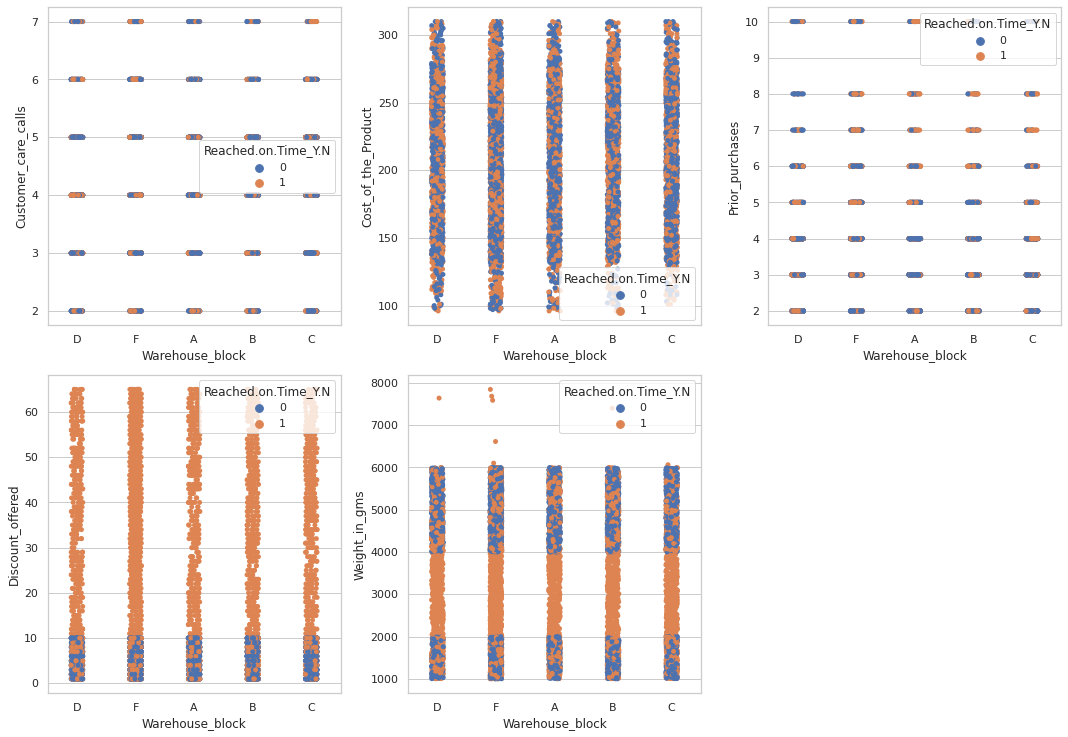

In [689]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Warehouse_block', y=num[i], hue='Reached.on.Time_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

**Insight :** Setiap blok warehouse terlambat dengan diskon lebih dari 10% dan berat 2-4kg.

#### b) Mode_of_Shipment

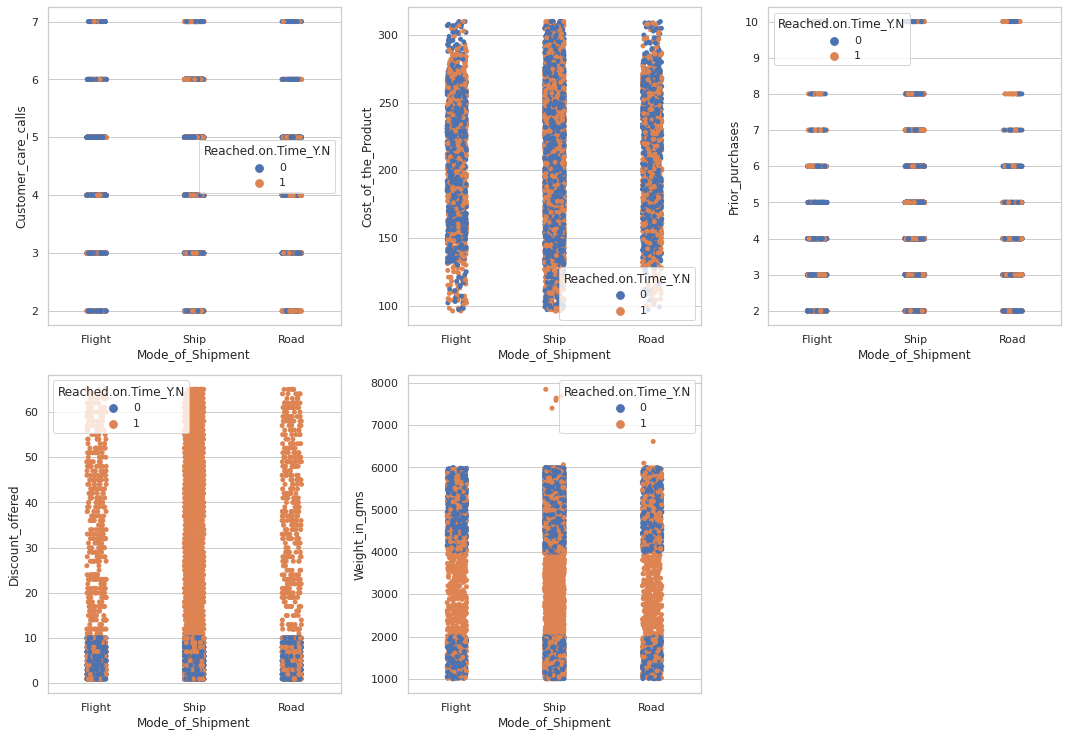

In [690]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Mode_of_Shipment', y=num[i], hue='Reached.on.Time_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

**Insight :**  Setiap mode pengiriman mengalami keterlambatan dengan diskon lebih dari 10% dan berat 2-4kg.

#### c) Product_importance

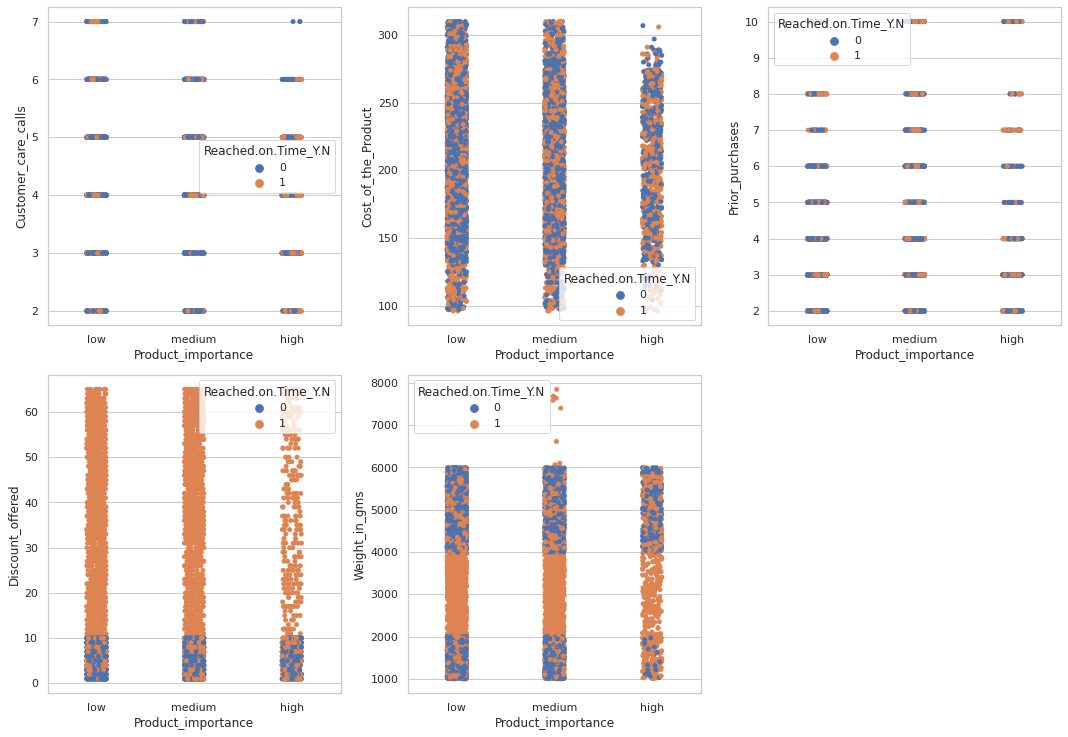

In [691]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Product_importance', y=num[i], hue='Reached.on.Time_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

**Insight :** Setiap produk_importance mengalami keterlambatan dengan diskon lebih dari 10% dan berat 2-4kg.

#### d) Gender

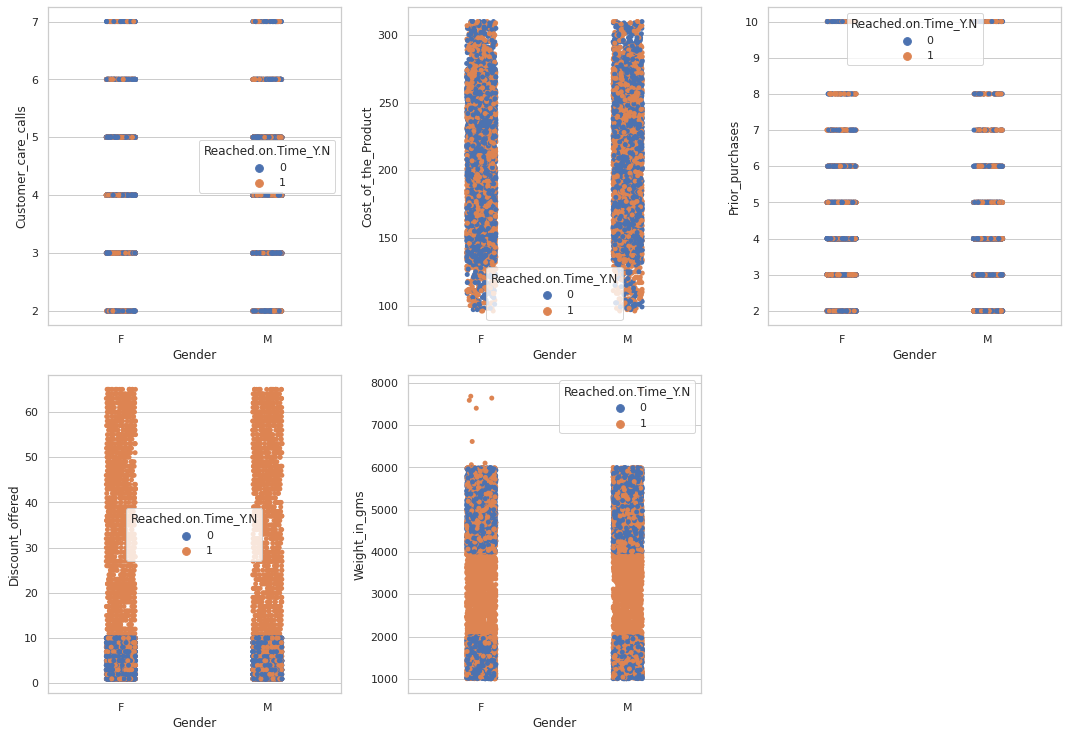

In [692]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Gender', y=num[i], hue='Reached.on.Time_Y.N') # gambar catplot/stripplotnya
    plt.tight_layout()

**Insight :** Keterlambatan dengan diskon lebih dari 10% dan berat 2-4kg dialami oleh Wanita dan Pria.

# <B> 5. BUSINESS INSIGHT

## <i> A Insight

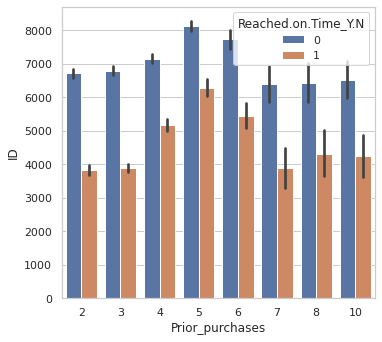

In [693]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df,x=df['Prior_purchases'],y=df['ID'],hue=df['Reached.on.Time_Y.N'])
plt.show()

Pelanggan awal membeli barang sampai 10x namun hasilnya tetap terlambat.

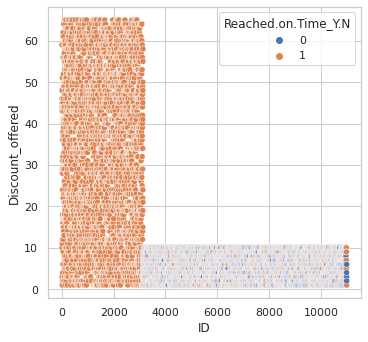

In [694]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x=df['ID'],y=df['Discount_offered'],hue=df['Reached.on.Time_Y.N'])
plt.show()

Pelanggan awal memiliki pemberian diskon diatas 10% hal ini menimbulkan spekulasi : </mark>
- Diskon yang diberikan adalah bentuk kompensasi karena mengalami keterlambatan.
- Loyalitas perusahaan kurang memperhatikan pelanggan awal.

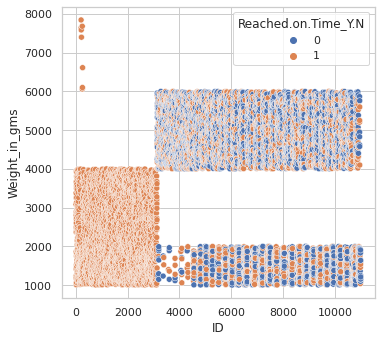

In [695]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df,x=df['ID'],y=df['Weight_in_gms'],hue=df['Reached.on.Time_Y.N'])
plt.show()

Berat barang 1-4 kg mengalami keterlambatan pada 3.000 pelanggan pertama.

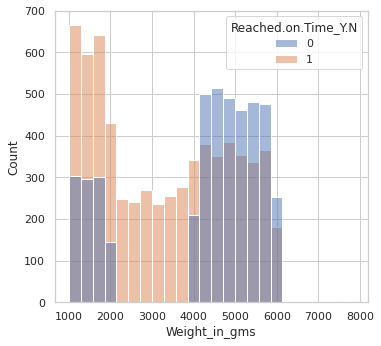

In [696]:
plt.figure(figsize=(5, 5))
sns.histplot(data=df,x=df['Weight_in_gms'],hue=df['Reached.on.Time_Y.N'])
plt.show()

Seluruh barang dengan berat 2-4 kg **pasti** terlambat.

## <i> B. Kesimpulan EDA

- Pemberian diskon dilakukan sebagai bentuk kompensasi atas keterlambatan barang.
- Kebanyakan yang melakukan pembelian adalah perempuan dengan 30% diantaranya mengalami keterlambatan.
- ID 3.000 awal dan berat antara 2-4kg mengalami keterlambatan.

## <i> C. Rekomendasi Bisnis

- Pelacakan secara Real time agar dapat mengetahui keberadaan posisi pengiriman 
- Pemberian penambahan estimasi waktu yang diberikan
- Dilakukan Audit terhadap ID dan berat untuk 3.000 ID awal dan berat antara 2-4kg

# <B> 6. DATA PREPROCESSING

## <i> A. Handle Missing Values

Tidak dilakukan karena pada dataset **tidak ada nilai yang kosong**.

## <i> B. Handle Duplicated Data

Tidak dilakukan karena pada dataset **tidak ada nilai duplikat.**

## <i> C. Feature Extraction


### Category_loyalty

In [697]:
df['Category_loyalty'] = np.where(df['Prior_purchases'] < 4, 'Silver',
                                  np.where(df['Prior_purchases'] > 6, 'Platinum', 'Gold'))

### Category_cost_of_the_product

In [698]:
df['Category_cost_of_the_product'] = np.where(df['Cost_of_the_Product'] < 170, 'Cheap',
                                              np.where(df['Cost_of_the_Product'] > 251, 'Expensive', 'Standard'))

### Category_Weight

In [699]:
df['Category_Weight'] = np.where(df['Weight_in_gms'] <= 2000, 'Light',
                                              np.where(df['Weight_in_gms'] >= 5000, 'Heavy', 'Medium'))

## <i> D. Label Encoding


label encoding dilakukan pada feature product importance dikarenakan feature tersebut merupakan tipe data ordinal

#### Product Importance

In [700]:
mapping_product_importance = {
    'low': 1,
    'medium': 2,
    'high': 3
}
df['Product_importance'] = df['Product_importance'].map(mapping_product_importance)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Category_loyalty,Category_cost_of_the_product,Category_Weight
0,1,D,Flight,4,2,177,3,1,F,44,1233,1,Silver,Standard,Light
1,2,F,Flight,4,5,216,2,1,M,59,3088,1,Silver,Standard,Medium
2,3,A,Flight,2,2,183,4,1,M,48,3374,1,Gold,Standard,Medium
3,4,B,Flight,3,3,176,4,2,M,10,1177,1,Gold,Standard,Light
4,5,C,Flight,2,2,184,3,2,F,46,2484,1,Silver,Standard,Medium


In [701]:
mapping_Category_loyalty = {
    'Silver': 1,
    'Gold': 2,
    'Platinum': 3
}
df['Category_loyalty'] = df['Category_loyalty'].map(mapping_Category_loyalty)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Category_loyalty,Category_cost_of_the_product,Category_Weight
0,1,D,Flight,4,2,177,3,1,F,44,1233,1,1,Standard,Light
1,2,F,Flight,4,5,216,2,1,M,59,3088,1,1,Standard,Medium
2,3,A,Flight,2,2,183,4,1,M,48,3374,1,2,Standard,Medium
3,4,B,Flight,3,3,176,4,2,M,10,1177,1,2,Standard,Light
4,5,C,Flight,2,2,184,3,2,F,46,2484,1,1,Standard,Medium


In [702]:
mapping_Category_cost_of_the_product = {
    'Cheap': 1,
    'Standard': 2,
    'Expensive': 3
}
df['Category_cost_of_the_product'] = df['Category_cost_of_the_product'].map(mapping_Category_cost_of_the_product)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Category_loyalty,Category_cost_of_the_product,Category_Weight
0,1,D,Flight,4,2,177,3,1,F,44,1233,1,1,2,Light
1,2,F,Flight,4,5,216,2,1,M,59,3088,1,1,2,Medium
2,3,A,Flight,2,2,183,4,1,M,48,3374,1,2,2,Medium
3,4,B,Flight,3,3,176,4,2,M,10,1177,1,2,2,Light
4,5,C,Flight,2,2,184,3,2,F,46,2484,1,1,2,Medium


In [703]:
mapping_Category_Weight = {
    'Light': 1,
    'Medium': 2,
    'Heavy': 3
}
df['Category_Weight'] = df['Category_Weight'].map(mapping_Category_Weight)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Category_loyalty,Category_cost_of_the_product,Category_Weight
0,1,D,Flight,4,2,177,3,1,F,44,1233,1,1,2,1
1,2,F,Flight,4,5,216,2,1,M,59,3088,1,1,2,2
2,3,A,Flight,2,2,183,4,1,M,48,3374,1,2,2,2
3,4,B,Flight,3,3,176,4,2,M,10,1177,1,2,2,1
4,5,C,Flight,2,2,184,3,2,F,46,2484,1,1,2,2


### One-hot Encoding

One-hot Encoding dilakukan pada feature warehouse block, mode of shipement, dan gender dikarenakan feature-feature tersebut merupakan tipe data categorical

#### warehouse block

In [704]:
warehouse = pd.get_dummies(df['Warehouse_block'], prefix='Warehouse')
df = pd.concat([warehouse,df], axis=1)

#### mode of shipment

In [705]:
shipment = pd.get_dummies(df['Mode_of_Shipment'], prefix='Shipment')
df = pd.concat([shipment,df], axis=1)

#### gender

In [706]:
gender = pd.get_dummies(df['Gender'], prefix='Gender')
df = pd.concat([gender,df], axis=1)

## <i> E. Feature Selection

In [707]:
# drop kolom kategori yang sudah di encoding
df_new = df.drop(columns=['Product_importance','Warehouse_block','Mode_of_Shipment','Gender','Prior_purchases','Cost_of_the_Product','Weight_in_gms', 'ID'])

In [708]:
df_new.head()

,Gender_F,Gender_M,Shipment_Flight,Shipment_Road,Shipment_Ship,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Customer_care_calls,Customer_rating,Discount_offered,Reached.on.Time_Y.N,Category_loyalty,Category_cost_of_the_product,Category_Weight
0,1,0,1,0,0,0,0,0,1,0,4,2,44,1,1,2,1
1,0,1,1,0,0,0,0,0,0,1,4,5,59,1,1,2,2
2,0,1,1,0,0,1,0,0,0,0,2,2,48,1,2,2,2
3,0,1,1,0,0,0,1,0,0,0,3,3,10,1,2,2,1
4,1,0,1,0,0,0,0,1,0,0,2,2,46,1,1,2,2


In [709]:
df_new['Reached.on.Time_Y.N']=df_new['Reached.on.Time_Y.N'].astype(np.int)
df_new['Customer_rating']=df_new['Customer_rating'].astype(np.int)

## <i> F. Spliting Data

In [710]:
# split train test
X = df_new.drop(columns='Reached.on.Time_Y.N')
y = df_new[['Reached.on.Time_Y.N']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [711]:
train = pd.concat([X_train, y_train], axis=1)

In [712]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 8965 to 7270
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Gender_F                      8799 non-null   uint8
 1   Gender_M                      8799 non-null   uint8
 2   Shipment_Flight               8799 non-null   uint8
 3   Shipment_Road                 8799 non-null   uint8
 4   Shipment_Ship                 8799 non-null   uint8
 5   Warehouse_A                   8799 non-null   uint8
 6   Warehouse_B                   8799 non-null   uint8
 7   Warehouse_C                   8799 non-null   uint8
 8   Warehouse_D                   8799 non-null   uint8
 9   Warehouse_F                   8799 non-null   uint8
 10  Customer_care_calls           8799 non-null   int64
 11  Customer_rating               8799 non-null   int64
 12  Discount_offered              8799 non-null   int64
 13  Category_loyalty              

## <i> G. Outliers

Outlier **tidak di handle** karena akan fokus menggunakan model yang robust terhadap outlier.

## <i> H. Feature transformation

Dikarenakan distribusi data pada Discount_offered dan Prior_purchases (Category_loyalty)  masih right skewed, maka akan dilakukan feature transformation dengan membandingkan normalization, standarization dan log transformation. Dari ketiga feature tranformation tersebut dipilih salah satu yang bentuk distribusi datanya mendekati distribusi normal

#### Normalization

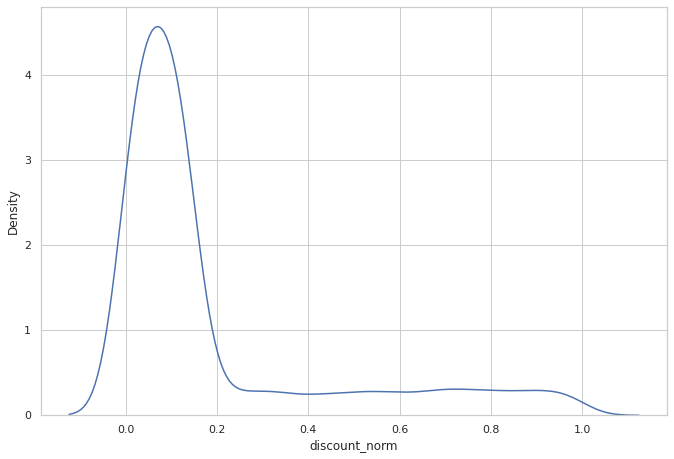

In [713]:
train['discount_norm'] = MinMaxScaler().fit_transform(train['Discount_offered'].values.reshape(len(train),1))
sns.kdeplot(train['discount_norm'])

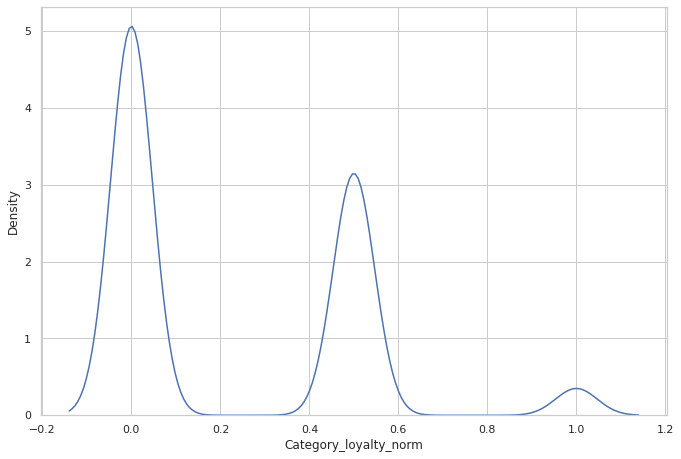

In [714]:
train['Category_loyalty_norm'] = MinMaxScaler().fit_transform(train['Category_loyalty'].values.reshape(len(train),1))
sns.kdeplot(train['Category_loyalty_norm'])

#### Standard Scaler

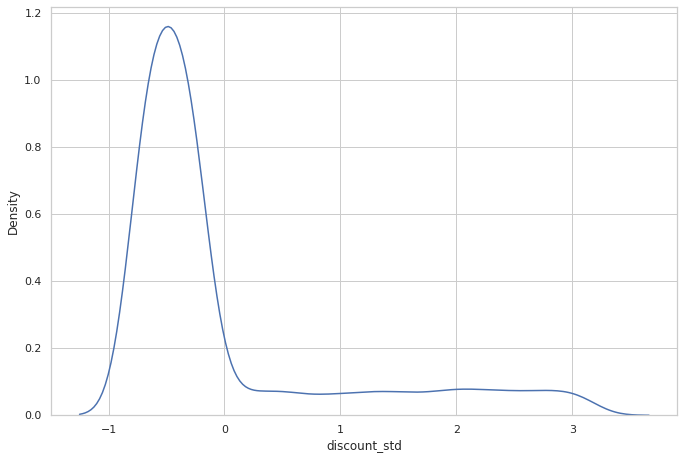

In [715]:
train['discount_std'] = StandardScaler().fit_transform(train['Discount_offered'].values.reshape(len(train),1))
sns.kdeplot(train['discount_std'])

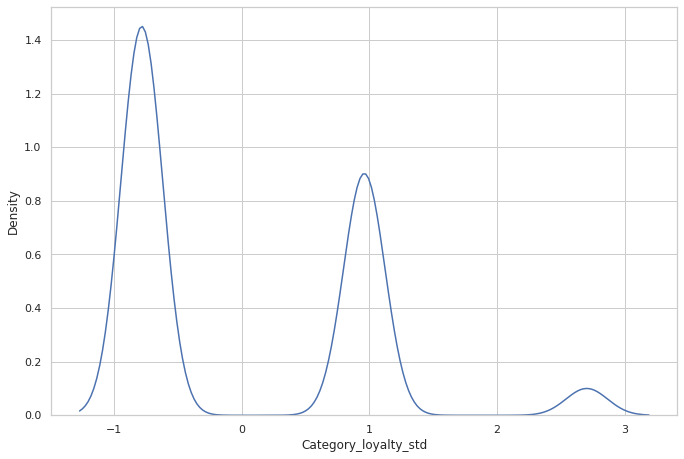

In [716]:
train['Category_loyalty_std'] = StandardScaler().fit_transform(train['Category_loyalty'].values.reshape(len(train),1))
sns.kdeplot(train['Category_loyalty_std'])

#### Log Tranformation

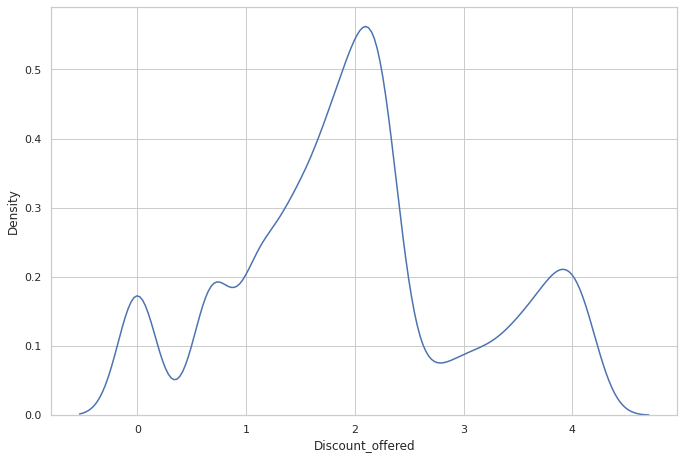

In [717]:
#distribusi 'Discount_offered' setelah lof transformation
sns.kdeplot(np.log(train['Discount_offered']))
train['log_discount'] = np.log(train['Discount_offered'])

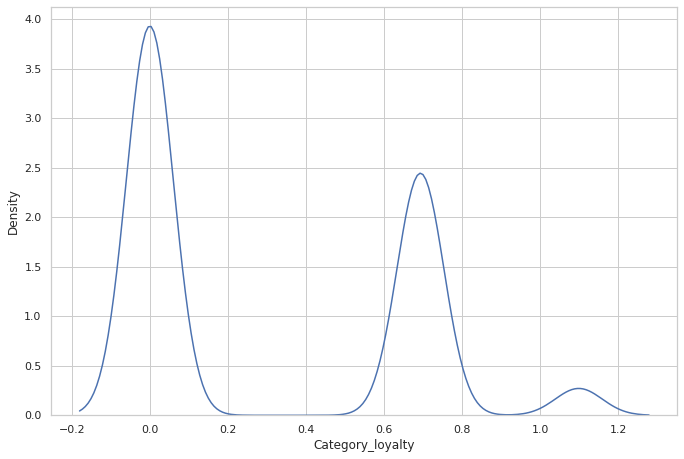

In [718]:
#distribusi 'Prior_purchases' setelah lof transformation
sns.kdeplot(np.log(train['Category_loyalty']))
train['log_Category_loyalty'] = np.log(train['Category_loyalty'])

berdasarkan hasil distribusi dari normalization, stadardization, dan log tranformation, bentuk yang mendekati distribusi normal adalah log transformation.

In [719]:
train['Discount_offered']=train['log_discount'] 

In [720]:
train['Category_loyalty']=train['log_Category_loyalty']

In [721]:
# drop kolom kategori yang sudah di encoding
train = train.drop(columns=['discount_norm','discount_std','Category_loyalty_norm','Category_loyalty_std','log_discount','log_Category_loyalty'])

## <i> I. Handle class imbalance

### Class Distribution

In [722]:

X = train.drop(['Reached.on.Time_Y.N'],axis=1)
y = train['Reached.on.Time_Y.N']

In [723]:
y.value_counts()

1    5258
0    3541
Name: Reached.on.Time_Y.N, dtype: int64

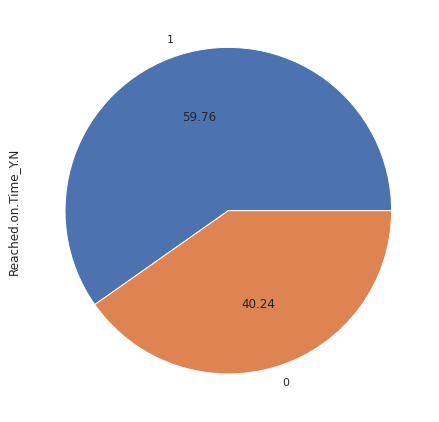

In [724]:
# show pie plot
y.value_counts().plot.pie(autopct='%.2f')

### Random Oversampling

In [725]:
from imblearn import under_sampling, over_sampling
# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

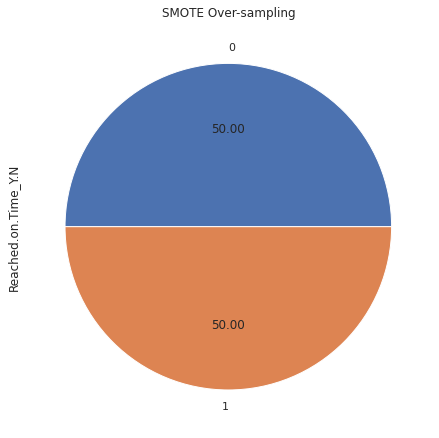

In [726]:
ax = y_over_smote.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title('SMOTE Over-sampling')

In [727]:
y_over_smote.value_counts()

0    5258
1    5258
Name: Reached.on.Time_Y.N, dtype: int64

In [728]:
X_train = X_over_smote
y_train =y_over_smote